# Part_2 EDA

- [Authors](#Authors)
- [Languages](#Languages)
- [Books](#Books)
- [Genres](#Genres)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
from sklearn.feature_extraction.text import CountVectorizer
import self_created_functions as scf
#import re
%matplotlib inline

In [2]:
df = pd.read_csv('./cleaned_datasets/books_clean.csv')
print(df.shape)
df.head(3)

(54478, 9)


,author,avg_rating,genres,language,num_pages,num_ratings,num_reviews,title,url
0,jon krakauer,4.00,environment travel survival biography memoir a...,English,215.0,983231.0,24367.0,Into the Wild,https://www.goodreads.com/book/show/1845.Into_...
1,bell hooks,4.14,social movement politic sociology race women s...,English,123.0,18885.0,1586.0,Feminism Is for Everybody: Passionate Politics,https://www.goodreads.com/book/show/168484.Fem...
2,mark bowden,4.28,war africa north american cultural politic mil...,English,386.0,59451.0,1727.0,Black Hawk Down: A Story of Modern War,https://www.goodreads.com/book/show/55403.Blac...


## Authors
[Back to top](#Part_2-EDA)

In [3]:
author = df.groupby(by='author')

#### Top 10 authors with the most books in this dataset

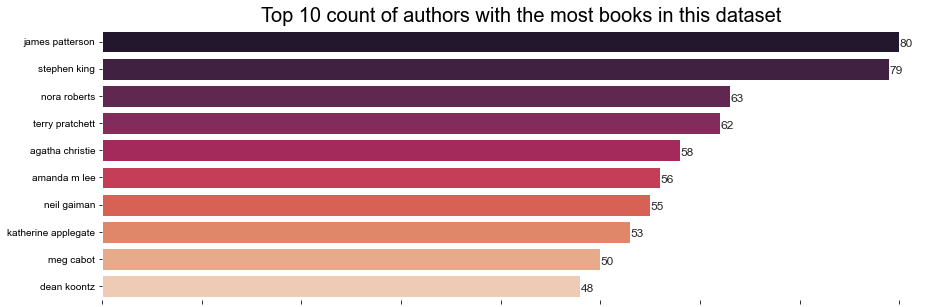

In [4]:
author_count = author[['title']].count().sort_values(by='title',ascending=False)[1:11]
title = "Top 10 count of authors with the most books in this dataset"
most_books = scf.plot_df(df=author_count,x='title',y='author',title =title)

Anonymous is actually at the top with 94 books but they could be from 94 different authors or 1. Without deep research beyond the scope of this project, there is no way to tell. So we'll leave it out of our EDA.

---

#### Top 10 most popular author (with the most reviews)

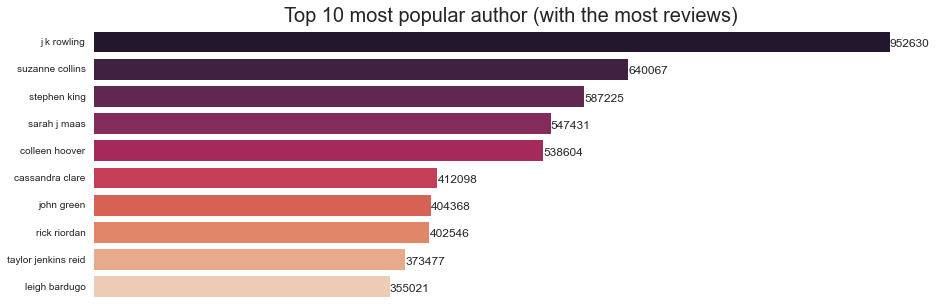

In [5]:
author_review= author[['num_reviews']].sum().sort_values(by='num_reviews',ascending=False)[:10]
title = "Top 10 most popular author (with the most reviews)"
most_reviews = scf.plot_df(df=author_review,x='num_reviews',y='author',title =title)

J K rowling is at the top with almost 1 million reviews. The difference between the second author Suzanne Collins is almost 300,000

The top 5 authors all have TV shows or movies made from their books. Could this be a factor in their popularity or is it the other way round because they're so popular movies/dramas were created?

---

#### Top 10 authors who wrote the most number of pages in total

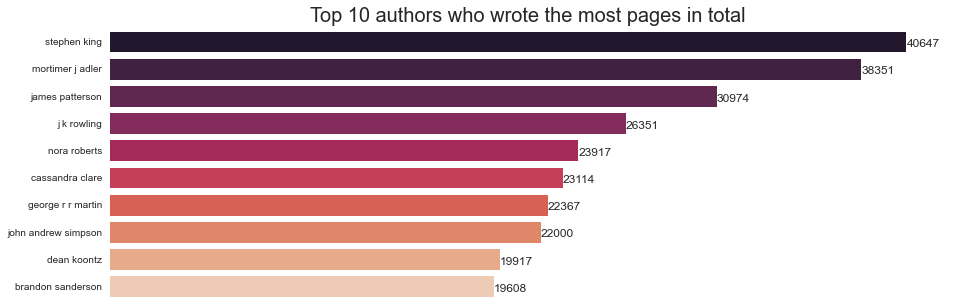

In [6]:
author_pages = author[['num_pages']].sum().sort_values(by='num_pages',ascending=False)[1:11]
title = "Top 10 authors who wrote the most pages in total"
most_pages = scf.plot_df(df=author_pages,x='num_pages',y='author',title =title)

Once again anonymous is at the top, after removing unknown authors, we can see that on average the top 10 authors who write the most tend to have written an average of 25,000 pages

---

#### Most Prolific Author

In [7]:
# Find for authors that appear in all 3 top 10 plots
top_10_combine = most_books+most_pages+most_reviews
[k for k,v in {x: top_10_combine.count(x) for x in top_10_combine}.items() if v ==3]

['stephen king']

The only author that appeared in the top 10 list for all three is Stephen King.

---

## Languages
[Back to top](#Part_2-EDA)

In [8]:
print(f"There are a total of {df.language.nunique()} unique languages in this dataset")

There are a total of 63 unique languages in this dataset


#### Top 10 languages used to write the books

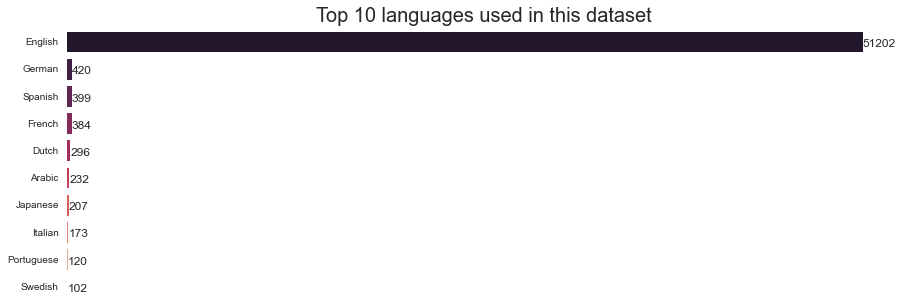

In [9]:
language = df.groupby('language').count().sort_values(by='title',ascending=False)[0:10]
title = "Top 10 languages used in this dataset"
most_books = scf.plot_df(df=language,x='title',y='language',title =title)

In [10]:
print(f"{round(51200/df.shape[0]*100,2)}% of the books in this dataset are written in English")

93.98% of the books in this dataset are written in English


If we remove books written in English from the plot, we get:

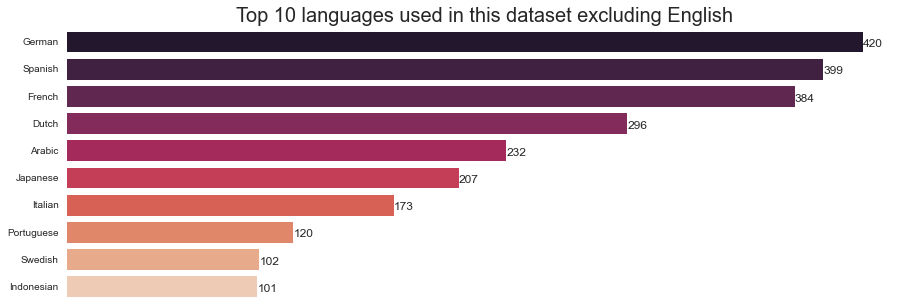

In [11]:
language = df.groupby('language').count().sort_values(by='title',ascending=False)[1:11]
title = "Top 10 languages used in this dataset excluding English"
most_books = scf.plot_df(df=language,x='title',y='language',title =title)

Interesting that although Indonesian and Japenese made it to the top 10 list of languages, missing are the languages Chinese, Hindi, and Russian. One hypothesis is that this could be a reflection of the users of the site rather then an actual global consensus.

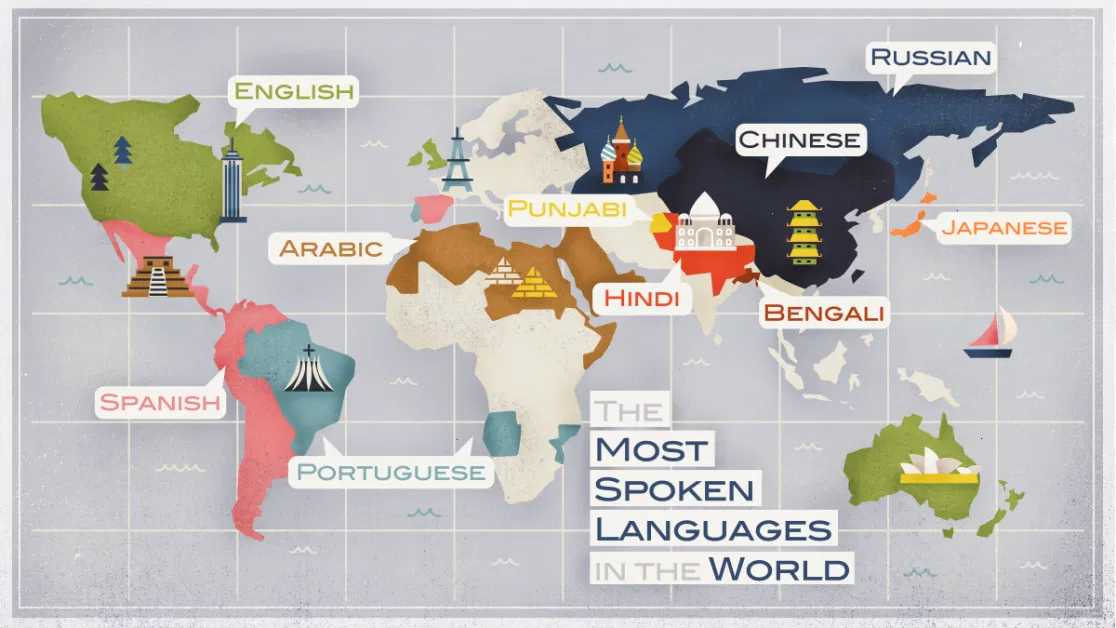
[image source](https://www.babbel.com/en/magazine/the-10-most-spoken-languages-in-the-world)

---

## Books
[Back to top](#Part_2-EDA)

#### What is the ratings distribution of the books like?

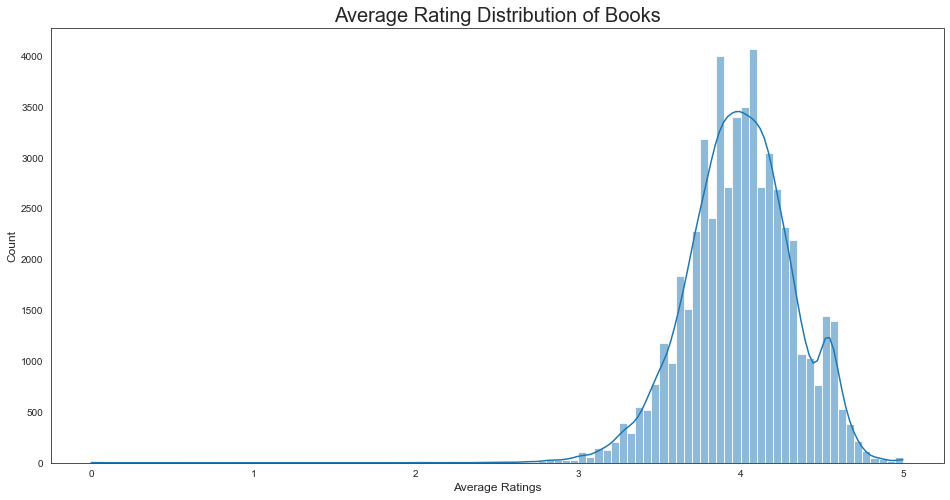

In [12]:
fig, ax = plt.subplots(figsize=[16,8])
sns.histplot(df['avg_rating'],ax=ax,bins=100,kde=True)
ax.set_title('Average Rating Distribution of Books',fontsize=20)
ax.set_xlabel('Average Ratings',fontsize=12)
ax.set_ylabel('Count',fontsize=12);

Not susprisingly, as all these books made it into a list of books readers would recommend for one reason or the other, the ratings are clustered around the scale 4

---

#### Top 10 rated books with at least 50,000 reviews

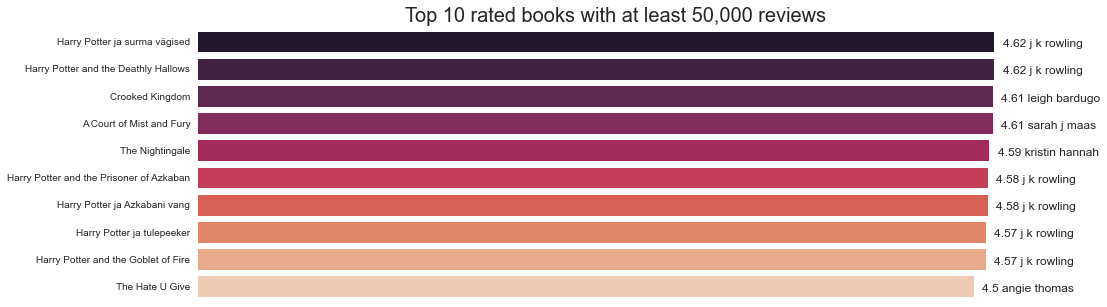

In [13]:
books_rated = df[df['num_reviews']>=50000]
books_rated = books_rated.sort_values(by='avg_rating', ascending=False).head(10)
books_rated.reset_index(drop=True,inplace=True)
title = "Top 10 rated books with at least 50,000 reviews"
scf.plot_df_books(books_rated,'avg_rating',title,float)

The Harry Potter series dominates the top 10 highest average rating with 6 out of 10 being from that series. What if we take J K rowling out of the chart?

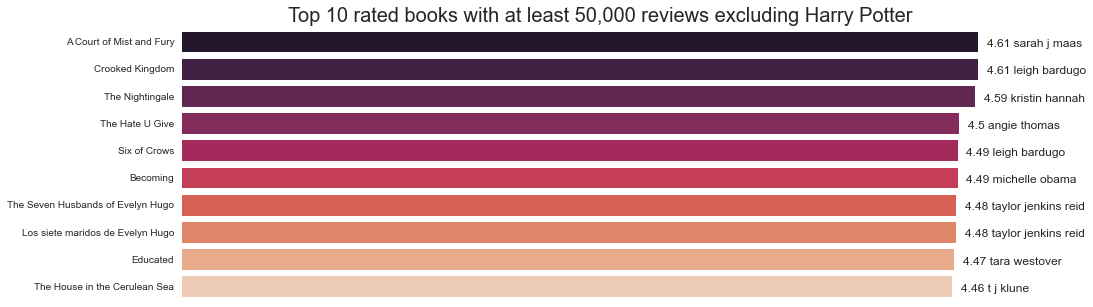

In [14]:
books_rated = df[(df['num_reviews']>=50000) & (df['author'] != 'j k rowling')]
books_rated = books_rated.sort_values(by='avg_rating', ascending=False).head(10)
books_rated.reset_index(drop=True,inplace=True)
title = "Top 10 rated books with at least 50,000 reviews excluding Harry Potter"
scf.plot_df_books(books_rated,'avg_rating',title,float)

---

#### Top 10 thickest books

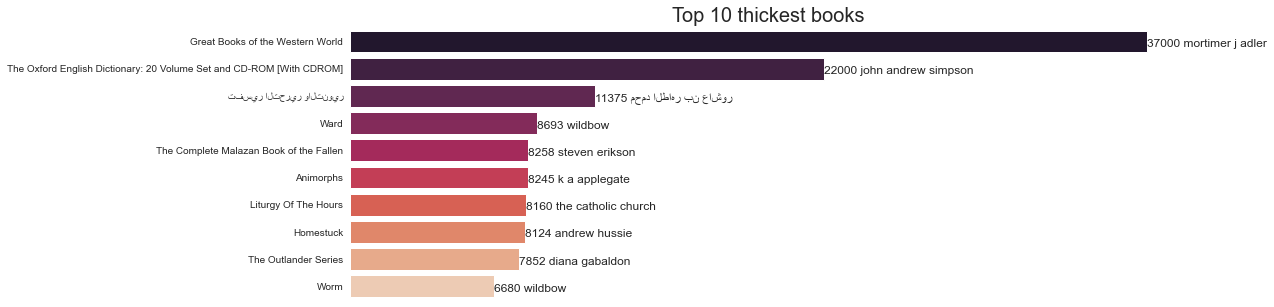

In [15]:
books_pages = df.sort_values(by='num_pages', ascending=False).head(10)
books_pages.reset_index(drop=True,inplace=True)
title = "Top 10 thickest books"
scf.plot_df_books(books_pages,'num_pages',title,int)

تفسير التحرير والتنوير is an arabic text interpretating the Quran and its teachings

Great Books of the Western World is actually a 54 volume set of books

---

## Genres
[Back to top](#Part_2-EDA)

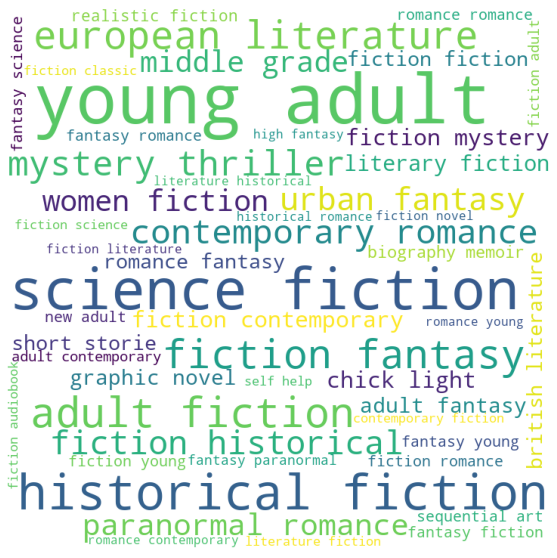

In [16]:
# Generate wordcloud
genres = ' '.join(df['genres'])
                                                        
plt.subplots(figsize =(15,10))
wc_genres = wc.WordCloud(max_words=50, width=720, height=720, background_color= 'white',relative_scaling=0.5).generate(genres)
plt.imshow(wc_genres)
plt.axis('off')
wc_genres.to_file('./images/wordcloud_genres.png');

#### Top 10 genres using count vectorizer

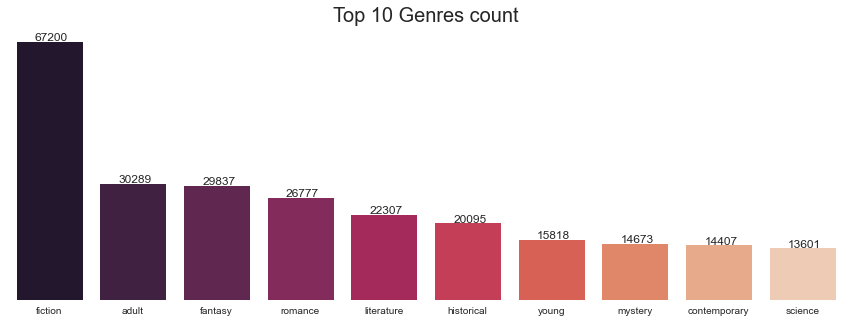

In [17]:
#bar plot using count vectorizer
cvec = CountVectorizer()
cvec_genres = cvec.fit_transform(df['genres'])
df_cvec_genres = pd.DataFrame(cvec_genres.todense(),columns=cvec.get_feature_names_out())
df_cvec_genres = df_cvec_genres.sum().sort_values(ascending=False).head(10)
df_cvec_genres = pd.DataFrame({'genre':df_cvec_genres.index,'count':df_cvec_genres.values})

title = 'Top 10 Genres count'
plt.figure(figsize=(15,5))
plt.title(title,size=20)
sns.set_style('white')
plot = sns.barplot(y='count',x='genre',data=df_cvec_genres,palette="rocket")
plt.xlabel("")
plt.ylabel("")
values = [x for x in df_cvec_genres['count']]
index = df_cvec_genres.index
for i,v in zip(index,values):
    plot.text(x=i-0.17,y=v+0.15,s=int(v),size=12)
sns.despine(left=True,bottom=True)
plot.grid(False)
plot.tick_params(axis='y',labelleft=False)
plt.savefig("./images/"+title+".png",bbox_inches='tight',dpi=150);

What about two words phrases? (Increasing the ngram to 2)

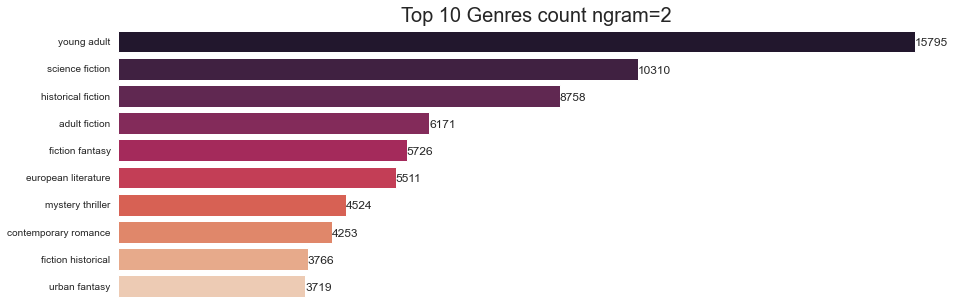

In [18]:
cvec_2 = CountVectorizer(ngram_range=(2,2))
cvec_genres2 = cvec_2.fit_transform(df['genres']).toarray()
df_cvec_genres_2 = pd.DataFrame(data = cvec_genres2, columns = cvec_2.get_feature_names_out())
df_cvec_genres_2 = df_cvec_genres_2.sum().sort_values(ascending=False).head(10)
df_cvec_genres_2 = pd.DataFrame({'genre':df_cvec_genres_2.index,'count':df_cvec_genres_2.values})

title = 'Top 10 Genres count ngram=2'
plt.figure(figsize=(15,5))
plt.title(title,size=20)
sns.set_style('white')
plot = sns.barplot(x='count',y='genre',data=df_cvec_genres_2,palette="rocket")
plt.xlabel("")
plt.ylabel("")
values = [x for x in df_cvec_genres_2['count']]
index = df_cvec_genres_2.index
for i,v in zip(index,values):
    plot.text(y=i+0.17,x=v+0.15,s=int(v),size=12)
sns.despine(left=True,bottom=True)
plot.grid(False)
plot.tick_params(axis='x',labelbottom=False)
plt.savefig("./images/"+title+".png",bbox_inches='tight',dpi=150);

## Correlations
[Back to top](#Part_2-EDA)

In [19]:
df_quants = df[['avg_rating','num_pages','num_ratings', 'num_reviews']]

#### Pairplots
For a quick look at possible correlation between the quantitative features

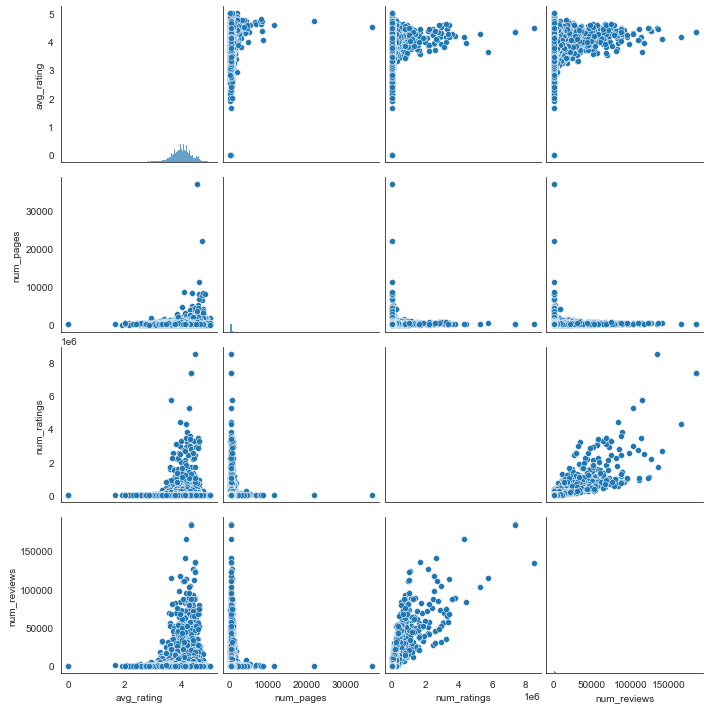

In [20]:
sns.pairplot(df_quants);

#### Heatmap

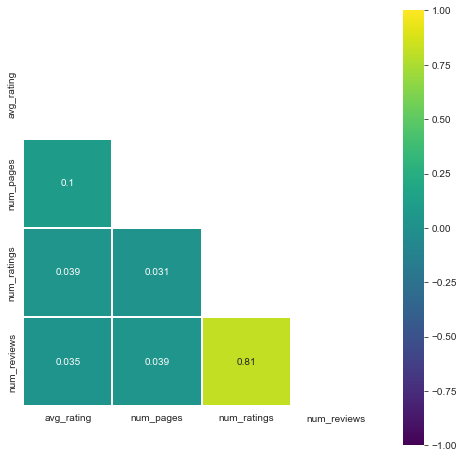

In [21]:
# Plot heatmap
plt.figure(figsize=(8,8))

corr = df_quants.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(corr,mask=mask,square= True,annot=True, linewidths=0.25,vmin = -1, vmax = 1, cmap='viridis')

Nothing of significance stands out. Except for the correlation of the number of ratings to the number of reviews. But this is expected since a person that review the book would most probably give it a rating too.